In [1]:
import lightning
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np

from torchvision.datasets import MNIST

# Lab 4: Convolutional Neural Networks

In [2]:
def preprocess(x):
    i = np.array(x)
    i = i / 255.0
    i = np.expand_dims(i, axis=0)
    return i

dataset = MNIST("/results/mgazda/MNIST", download=True, transform=preprocess)


## MNIST Dataset

In [ ]:
class ConvolutionalNetwork(nn.Module): 
    def __init__(self, in_channels: int):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, 16, kernel_size=3, stride=1, padding=1)
        self.act1 = nn.ReLU()
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=2)
        self.act2 = nn.ReLU()
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1)
        self.act3 = nn.ReLU()
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=2)
        self.act4 = nn.ReLU()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 5 * 5, 256)
        self.act5 = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)
        
        self.network = nn.Sequential(
            self.conv1,
            self.act1,
            self.conv2,
            self.act2,
            self.conv3,
            self.act3,
            self.conv4,
            self.act4,
            self.flatten,
            self.fc1,
            self.act5,
            self.fc2,
        )
        
        
    def forward(self, x):
        return self.network(x)
        

## CNN Architecture

In [9]:
loss = nn.CrossEntropyLoss()
network = ConvolutionalNetwork(in_channels=1).cuda()
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
optimizer = torch.optim.SGD(network.parameters(), lr=0.1)
MAX_EPOCH=10

evaluation_list = dataset[0], dataset[1], dataset[2], dataset[3], dataset[4]

network.eval()
evaluation_prediction_random = []
for img, label in evaluation_list:
    x = torch.Tensor(img).unsqueeze(0).cuda()
    y_pred = network.forward(x)
    predicted_index = torch.argmax(y_pred, dim=1).cpu().numpy()
    evaluation_prediction_random.append(predicted_index)

network.train()
for epoch in range(MAX_EPOCH):
    loss_epoch = 0.0
    for x, y in dataloader:
        y = y.cuda()
        y_pred = network(x.float().cuda())
        l = loss(y_pred, y)
        network.zero_grad()    
        l.backward()
        optimizer.step()
        loss_epoch += l.item()
    print(f"Epoch {epoch+1}/{MAX_EPOCH}, Loss: {loss_epoch/len(dataloader)}")

network.eval()
evaluation_prediction_trained = []
for img, label in evaluation_list:
    x = torch.Tensor(img).unsqueeze(0).cuda()
    y_pred = network(x)
    predicted_index = torch.argmax(y_pred, dim=1).cpu().numpy()
    evaluation_prediction_trained.append(predicted_index)

Epoch 1/10, Loss: 0.27625945288045334
Epoch 2/10, Loss: 0.05225866692382454
Epoch 3/10, Loss: 0.03418340468197906
Epoch 4/10, Loss: 0.02408657259815033
Epoch 5/10, Loss: 0.018840321715745813
Epoch 6/10, Loss: 0.013451951897126977
Epoch 7/10, Loss: 0.010062169418787804
Epoch 8/10, Loss: 0.00869607666566535
Epoch 9/10, Loss: 0.005933243771153775
Epoch 10/10, Loss: 0.006258728184171688


## Training

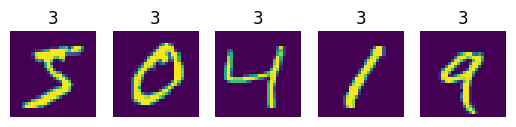

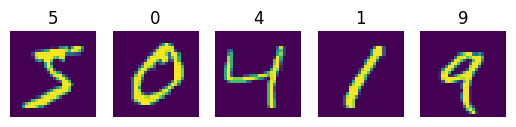

In [ ]:
fig, axs = plt.subplots(1, 5)
for i in range(5):
    axs[i].imshow(evaluation_list[i][0][0])
    axs[i].axis('off')
    axs[i].set_title(evaluation_prediction_random[i][0])

    
fig, axs = plt.subplots(1, 5)
for i in range(5):
    axs[i].imshow(evaluation_list[i][0][0])
    axs[i].axis('off')
    axs[i].set_title(evaluation_prediction_trained[i][0])

## Predictions: Before vs After